In [160]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import math


import pandas as pd
import glob


In [161]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity


In [162]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'

In [163]:
filenameMeta = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'

In [164]:
listofFiles = ['063','064','065','068','069',
    '100','101','102','103','104','105','106','107','108','109','110','111','112']



### concatenate all Meta Data Files to one data frame and export as csv

In [165]:
AllMetaData = pd.DataFrame()

for i in range(len(listofFiles)):
    df_temp = pd.read_excel(filenameMeta+'TEVCMetaSTFX'+listofFiles[i]+'-Selectivity.xlsx', sep="," )
    AllMetaData = AllMetaData.append(df_temp,ignore_index=True)
    #print(df_temp)
    
AllMetaData.to_csv(filedir+'MetaSelectivityNterm-.csv', header=True, index=None, sep=',', mode='w') 

#print(AllMetaData[1:10])
#print(filedir)

### example how to axxess files

In [166]:
AllMetaData['CellID'][1]

'STFX063013'

In [167]:
filenameRatio = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/'

### re-order Selectivity data in a way that Start solution and test solution are in one row. 

In [168]:
TESTDIC = {"Injection":[],"CellID":[],"StartSol":[],"VrStart":[],'Iminus85Start':[],"TestSol":[],"VrTest":[],'Iminus85Test':[]}

for i in range(len(AllMetaData['CellID'])): #range(28,29
    try:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
    except FileNotFoundError:
        continue
    else:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
        #print(df_temp.head())
        if len(df_temp) % 2 == 0:
            NewLoc = 0
            #print("{0} is Even".format(len(df_temp)))
            for m in range(int(len(df_temp)/2)):

                TESTDIC["Injection"].append(df_temp.loc[m,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #print(NewLoc)
                NewLoc = NewLoc +2
                #print(NewLoc)
                #NewLoc = NewLoc + 10
                #print(NewLoc)

        else:
           # print("{0} is Odd".format(len(df_temp)))
            NewLoc = 0
            for m in range(int((len(df_temp)-1)/2)): #check if -1 works for more than 3 rows, for 5???
                TESTDIC["Injection"].append(df_temp.loc[NewLoc,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #print(NewLoc)
                NewLoc = NewLoc +2

                
df = pd.DataFrame.from_dict(TESTDIC)

df = df.dropna(how='any')

df['Vd'] = df["VrTest"]-df["VrStart"]
df['Permeability'] = 1/(np.exp(df['Vd'].values*1000/25.6*-1))
df['Ratio'] = df["Iminus85Test"]/df["Iminus85Start"]

print(df.head())



          Injection      CellID   StartSol   VrStart  Iminus85Start  TestSol  \
0   mg418mg419mg012  STFX063014  NaGluSel1  0.005257   1.082743e-05  KGluSel   
3        mg418mg012  STFX063013  NaGluSel1 -0.009738   1.167834e-06  KGluSel   
6        mg418mg012  STFX063012  NaGluSel1 -0.008068   1.241020e-06  KGluSel   
9   mg418mg419mg012  STFX063011  NaGluSel1  0.008984   7.778207e-06  KGluSel   
12       uninjected  STFX063010  NaGluSel1 -0.012328   8.655528e-08  KGluSel   

      VrTest  Iminus85Test        Vd  Permeability     Ratio  
0  -0.039298  1.808445e-06 -0.044554      0.175448  0.167024  
3  -0.005735  1.194372e-06  0.004003      1.169253  1.022724  
6  -0.003690  1.261510e-06  0.004379      1.186534  1.016511  
9  -0.025637  2.249858e-06 -0.034621      0.258626  0.289251  
12  0.002457  2.743892e-07  0.014786      1.781697  3.170103  


### common axis parameters for figures below

In [169]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

SizeOfMarker = 2
SizeofLine = 0.5

# define color for regions

In [170]:
#change color for regions here
RegionA = '#d7191C'
RegionB = '#fdae61'
RegionC = '#2c7bb6'
RegionNterm = '#ffffbf'
RegionABC = '#abd9e9'
colorDT1 = '#e41a1c'
colorM4DT1 = '#ff7f00'

#alternative colors for '#fdae61' and #abd9e9
#d7191C (rot), #ffffbf(eggshell),#2c7bb6 (blue)
#used colorbrewer for colorblind

# Create here all the different Data Sets

In [171]:
#list of all mutants. commented out are those who did not generate current and thus I don't 
#have data for selectivity for them

ReNameAlanin ={'F84A':{'name':'mg738mg012','color':RegionA},# 
         'K85A':{'name':'mg739mg012','color':RegionA},
         'E86A':{'name':'mg740mg012','color':RegionA},
         #'F87A':{'name':'mg741mg012','color':RegionA},
         'C88A':{'name':'mg748mg012','color':RegionA},
         'Y89A':{'name':'mg759mg012','color':RegionA}, 
         'K90A':{'name':'mg745mg012','color':RegionA}, 
         #'T91A':{'name':'mg752mg012','color':RegionB},#B
         #'S92A':{'name':'mg749mg012','color':RegionB},#B
         'ctr A93':{'name':'mg419mg012','color':RegionB},#B
         'H94A':{'name':'mg750mg012','color':RegionB},#B
         #'G95A':{'name':'mg746mg012','color':RegionB},#B
         #'I96A':{'name':'mg747mg012','color':RegionC},#C 
         'P97A':{'name':'mg760mg012','color':RegionC},#C 
         'M98A':{'name':'mg753mg012','color':RegionC}, #C   
        # 'I99A':{'name':'mg761mg012','color':RegionC},#C 
         'G100A':{'name':'mg751mg012','color':RegionC}#C      
        }


ReNameChimera={ 'M4d (ctr A93)':{'name':'mg419mg012','color':RegionB},
               #'M4-NtermDT1':{'name':'mg755mg012','color':RegionNterm},
               #'M4d-DT1ABC':{'name':'mg733mg012','color':RegionABC},
               #'M4d-DT1A':{'name':'mg734mg012','color':RegionA},
               'M4d-DT1C':{'name':'mg742mg012','color':RegionC},
              }

ReNameChimeraHet = { #all constructs with M4d 
                'ctr A93':{'name':'mg419mg012','color':RegionB},
                'DT1d':{'name':'mg418mg012','color':colorDT1}, # no recordings in NaGluSel
                'M4d&DT1d':{'name':'mg418mg419mg012','color':colorM4DT1},
#                'M4-NtermDT1':{'name':'mg755mg012','color':RegionNterm},
#                'M4d-DT1ABC':{'name':'mg733mg012','color':RegionABC},
#                'M4d-DT1A':{'name':'mg734mg012','color':RegionA},
#                'M4d-DT1B':{'name':'mg735mg012','color':RegionB},              
               #heteromeric expression M4d and chimera M4d-DEGT1
                'M4+M4-DT1A':{'name':'mg419mg734mg012','color':RegionA},
               'M4+M4-DT1B':{'name':'mg419mg735mg012','color':RegionB},
               'M4+M4-DT1C':{'name':'mg419mg742mg012','color':RegionC},
                #all constructs with DEGT-1d              
                #'DT1-NtermM4':{'name':'mg756mg012','color':RegionB}, #not enough data
               #'DT1-M4ABC':{'name':'mg736mg012','color':RegionABC}, #not enough data (at least 3 needed)
               #'DT1-M4A':{'name':'mg737mg012','color':RegionA}, #not enough data
                #'DT1-M4B':{'name':'mg757mg012','color':RegionB},#not enough data
                'M4d-DT1C':{'name':'mg742mg012','color':RegionC},
#                'DT1-M4C':{'name':'mg758mg012','color':RegionC}, no expression
                #heteromeric expression M4d and chimera DT1d-M4C
               'M4+DT1-M4C':{'name':'mg419mg758mg012','color':RegionC},
        }


#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())
LabelChimeraHet = list(ReNameChimeraHet.keys())

In [172]:
LabelChimera

['M4d (ctr A93)', 'M4d-DT1C']

In [173]:
ReNameChimera

{'M4d (ctr A93)': {'name': 'mg419mg012', 'color': '#fdae61'},
 'M4d-DT1C': {'name': 'mg742mg012', 'color': '#2c7bb6'}}

In [174]:
# calculate P0 for mg418
#colors = ['black']
colors = []
for i in range(len(LabelAlanin)):
    colors.append(ReNameAlanin[LabelAlanin[i]]['color'])

colorsChimera = []
for i in range(len(LabelChimera)):
    colorsChimera.append(ReNameChimera[LabelChimera[i]]['color'])

colorsChimeraHet = []
for i in range(len(LabelChimeraHet)):
    colorsChimeraHet.append(ReNameChimeraHet[LabelChimeraHet[i]]['color'])


print(colorsChimeraHet)    
#colors = ['black','red','yellow','yellow','red','black','red','red', 'black','black','black', 'yellow','black','black',
      #'red','red','black','red']
#colors = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]

['#fdae61', '#e41a1c', '#ff7f00', '#d7191C', '#fdae61', '#2c7bb6', '#2c7bb6', '#2c7bb6']


In [175]:
#re-arranging data Alanin
#UninjAndAlanin = ["uninjected"]
UninjAndAlanin = []

for i in range(len(LabelAlanin)):
    UninjAndAlanin.append(ReNameAlanin[LabelAlanin[i]]['name'])
    
#Potassium = df[(df.Injection.isin(["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"])) & (df.TestSol.isin(["KGluSel"]))] 
Potassium = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["KGluSel"]))] 
Lithium = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["LiGluSel"]))] 
Nmg = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["NmgGluSel"]))] 

#re-arranging data chimera
UninjAndChimera = []
for i in range(len(LabelChimera)):
    UninjAndChimera.append(ReNameChimera[LabelChimera[i]]['name'])
    
PotassiumChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["KGluSel"]))] 
LithiumChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["LiGluSel"]))] 
NmgChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["NmgGluSel"]))] 

#re-arranging data chimera heteromeric
UninjAndChimeraHet = []
for i in range(len(LabelChimeraHet)):
    UninjAndChimeraHet.append(ReNameChimeraHet[LabelChimeraHet[i]]['name'])
    
PotassiumChimeraHet = df[(df.Injection.isin(UninjAndChimeraHet)) & (df.TestSol.isin(["KGluSel"]))] 
LithiumChimeraHet = df[(df.Injection.isin(UninjAndChimeraHet)) & (df.TestSol.isin(["LiGluSel"]))] 
NmgChimeraHet = df[(df.Injection.isin(UninjAndChimeraHet)) & (df.TestSol.isin(["NmgGluSel"]))] 




print(UninjAndAlanin)

['mg738mg012', 'mg739mg012', 'mg740mg012', 'mg748mg012', 'mg759mg012', 'mg745mg012', 'mg419mg012', 'mg750mg012', 'mg760mg012', 'mg753mg012', 'mg751mg012']


In [176]:
PotassiumChimera

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
266,mg419mg012,STFX068025,NaGluSel1,0.000319,2.098349e-05,KGluSel,-0.040275,3.717829e-06,-0.040594,0.204806,0.177179
271,mg419mg012,STFX068026,NaGluSel2,-0.006031,2.276110e-05,KGluSel,-0.044257,4.518321e-06,-0.038226,0.224652,0.198511
293,mg419mg012,STFX068033,NaGluSel4,-0.007289,1.637319e-05,KGluSel,-0.051481,2.344847e-06,-0.044192,0.177948,0.143213
298,mg419mg012,STFX069002,NaGluSel1,0.020139,2.383687e-05,KGluSel,-0.028993,3.754497e-06,-0.049132,0.146724,0.157508
310,mg419mg012,STFX069005,NaGluSel1,0.013733,1.975298e-05,KGluSel,-0.029858,3.509793e-06,-0.043590,0.182182,0.177684
330,mg419mg012,STFX069011,NaGluSel1,0.008419,2.446645e-05,KGluSel,-0.026976,4.690286e-06,-0.035395,0.250917,0.191703
345,mg419mg012,STFX069014,NaGluSel4,-0.006161,1.692854e-05,KGluSel,-0.025302,6.649986e-06,-0.019141,0.473457,0.392827
359,mg742mg012,STFX100019,NaGluSel1,-0.004266,3.849927e-05,KGluSel,-0.031912,1.369415e-05,-0.027646,0.339619,0.355699
360,mg419mg012,STFX100020,NaGluSel1,0.004873,1.299940e-05,KGluSel,-0.029979,2.729987e-06,-0.034853,0.256292,0.210009
367,mg742mg012,STFX100029,NaGluSel1,-0.000906,6.612157e-05,KGluSel,-0.026146,2.571656e-05,-0.025240,0.373095,0.388928


In [177]:
LabelAlanin

['F84A',
 'K85A',
 'E86A',
 'C88A',
 'Y89A',
 'K90A',
 'ctr A93',
 'H94A',
 'P97A',
 'M98A',
 'G100A']

# calculate Number of experiments

### Potassium and Alanin mutations

In [178]:
Potassium.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,14,1,KGluSel,14
mg738mg012,15,1,KGluSel,15
mg739mg012,10,1,KGluSel,10
mg740mg012,9,1,KGluSel,9
mg745mg012,6,1,KGluSel,6
mg748mg012,13,1,KGluSel,13
mg750mg012,9,1,KGluSel,9
mg751mg012,10,1,KGluSel,10
mg753mg012,13,1,KGluSel,13


### Lithium and Alanin mutations

In [179]:
Lithium.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,8,1,LiGluSel,8
mg738mg012,7,1,LiGluSel,7
mg739mg012,7,1,LiGluSel,7
mg740mg012,7,1,LiGluSel,7
mg745mg012,1,1,LiGluSel,1
mg748mg012,7,1,LiGluSel,7
mg750mg012,4,1,LiGluSel,4
mg751mg012,6,1,LiGluSel,6
mg753mg012,6,1,LiGluSel,6


### Nmg and Alanin mutations

In [180]:
Nmg.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,6,1,NmgGluSel,6
mg738mg012,4,1,NmgGluSel,4
mg739mg012,5,1,NmgGluSel,5
mg740mg012,5,1,NmgGluSel,5
mg748mg012,4,1,NmgGluSel,4
mg750mg012,3,1,NmgGluSel,3
mg751mg012,5,1,NmgGluSel,5
mg753mg012,5,1,NmgGluSel,5
mg759mg012,4,1,NmgGluSel,4


### Potassium and chimera mutations

In [181]:
PotassiumChimera.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,14,1,KGluSel,14
mg742mg012,13,1,KGluSel,13


### Lithium and chimera mutations

In [182]:
LithiumChimera.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,8,1,LiGluSel,8
mg742mg012,8,1,LiGluSel,8


### Nmg and chimera mutations

In [183]:
NmgChimera.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,6,1,NmgGluSel,6
mg742mg012,9,1,NmgGluSel,9


### Figure Relative permeability alanin mutations - vertical alignment of mutations

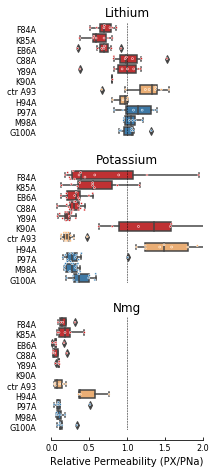

In [184]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 7.5))

orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
    
sns.swarmplot(y= Potassium['Injection'], x=Potassium['Permeability'], data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=SizeofLine, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= Potassium['Injection'], x=Potassium['Permeability'], data = Potassium, palette=sns.color_palette(colors),ax=axes[1],order=orderCons)

sns.swarmplot(y= Lithium['Injection'], x=Lithium['Permeability'], data =Lithium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= Lithium['Injection'], x=Lithium['Permeability'], data = Lithium, palette=sns.color_palette(colors),ax=axes[0],order=orderCons)

sns.swarmplot(y= Nmg['Injection'], x=Nmg['Permeability'], data =Nmg,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[2], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= Nmg['Injection'], x=Nmg['Permeability'], data = Nmg, palette=sns.color_palette(colors),ax=axes[2],order=orderCons)


YlimitPerm = [0,2]

for i in range(3): 
    axes[i].set_xlim(YlimitPerm)
    axes[i].spines['right'].set_visible(False)                                  # no spine at the right
    axes[i].spines['top'].set_visible(False)  # no spine at the top
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
    axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
    axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
    axes[i].spines['bottom'].set_position(('outward',10))  
    axes[i].spines['top'].set_position(('axes',5)) 
    axes[i].get_yaxis().set_tick_params(direction='in')
    axes[i].get_xaxis().set_tick_params(direction='in')
    #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
    axes[i].plot([1,1], [-10,50] , 'k--', color='#000000', linewidth=SizeofLine)
    #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
    axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
    #axes[i].yaxis.label.set_size(AxisLabelSize)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)
#     axes[i].yaxis.label.set_visible(False)
    
    n=0.5
    for M in range(len(labels2)):    
        axes[i].text(-0.2, n, labels2[M],ha='right',rotation=0,fontsize= AxisLegendSize)
        n = n+1
        #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

axes[1].set_title('Potassium',size=AxisLabelSize+2)    
axes[0].set_title('Lithium',size=AxisLabelSize+2) 
axes[2].set_title('Nmg',size=AxisLabelSize+2)

axes[2].xaxis.set_visible(True)
axes[2].spines['bottom'].set_visible(True)

axes[2].set_xlabel('')
#axes[2].set_ylabel('')

#axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
axes[2].set_xlabel('Relative Permeability (PX/PNa)', fontsize=AxisLabelSize)
#axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

plt.gcf().subplots_adjust(bottom=None, left=0.2,right=None, top=None,hspace=0.3, wspace=0.3)  

plt.savefig(filedirExportFig+"PermeabilityNtermAlanin-Transposed"+'.pdf')
    

### Alanin-RatioCurrent

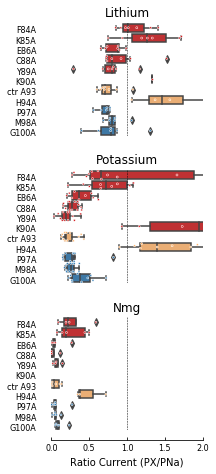

In [185]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 7.5))

orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
    
sns.swarmplot(y= Potassium['Injection'], x=Potassium['Ratio'], data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=SizeofLine, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= Potassium['Injection'], x=Potassium['Ratio'], data = Potassium, palette=sns.color_palette(colors),ax=axes[1],order=orderCons)

sns.swarmplot(y= Lithium['Injection'], x=Lithium['Ratio'], data =Lithium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= Lithium['Injection'], x=Lithium['Ratio'], data = Lithium, palette=sns.color_palette(colors),ax=axes[0],order=orderCons)

sns.swarmplot(y= Nmg['Injection'], x=Nmg['Ratio'], data =Nmg,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[2], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= Nmg['Injection'], x=Nmg['Ratio'], data = Nmg, palette=sns.color_palette(colors),ax=axes[2],order=orderCons)


YlimitPerm = [0,2]

for i in range(3): 
    axes[i].set_xlim(YlimitPerm)
    axes[i].spines['right'].set_visible(False)                                  # no spine at the right
    axes[i].spines['top'].set_visible(False)  # no spine at the top
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
    axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
    axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
    axes[i].spines['bottom'].set_position(('outward',10))  
    axes[i].spines['top'].set_position(('axes',5)) 
    axes[i].get_yaxis().set_tick_params(direction='in')
    axes[i].get_xaxis().set_tick_params(direction='in')
    #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
    axes[i].plot([1,1], [-10,50] , 'k--', color='#000000', linewidth=SizeofLine)
    #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
    axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
    #axes[i].yaxis.label.set_size(AxisLabelSize)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)
#     axes[i].yaxis.label.set_visible(False)
    
    n=0.5
    for M in range(len(labels2)):    
        axes[i].text(-0.2, n, labels2[M],ha='right',rotation=0,fontsize= AxisLegendSize)
        n = n+1
        #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

axes[1].set_title('Potassium',size=AxisLabelSize+2)    
axes[0].set_title('Lithium',size=AxisLabelSize+2) 
axes[2].set_title('Nmg',size=AxisLabelSize+2)

axes[2].xaxis.set_visible(True)
axes[2].spines['bottom'].set_visible(True)

axes[2].set_xlabel('')
#axes[2].set_ylabel('')

#axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
axes[2].set_xlabel('Ratio Current (PX/PNa)', fontsize=AxisLabelSize)
#axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

plt.gcf().subplots_adjust(bottom=None, left=0.2,right=None, top=None,hspace=0.3, wspace=0.3)  

plt.savefig(filedirExportFig+"PermeabilityNtermAlanin-RatioCurrent"+'.pdf')
    

### Figure Relative permeability alanin mutations - horizontal alignment of mutations

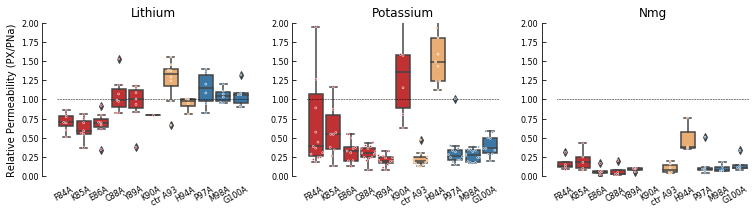

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
    
sns.swarmplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=SizeofLine, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium, palette=sns.color_palette(colors),ax=axes[1],order=orderCons)

sns.swarmplot(x= Lithium['Injection'], y=Lithium['Permeability'], data =Lithium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Lithium['Injection'], y=Lithium['Permeability'], data = Lithium, palette=sns.color_palette(colors),ax=axes[0],order=orderCons)

sns.swarmplot(x= Nmg['Injection'], y=Nmg['Permeability'], data =Nmg,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[2], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Nmg['Injection'], y=Nmg['Permeability'], data = Nmg, palette=sns.color_palette(colors),ax=axes[2],order=orderCons)


YlimitPerm = [0,2]

for i in range(3): 
    axes[i].set_ylim(YlimitPerm)
    axes[i].spines['right'].set_visible(False)                                  # no spine at the right
    axes[i].spines['top'].set_visible(False)  # no spine at the top
    axes[i].spines['bottom'].set_visible(False)
    axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
    axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
    axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
    axes[i].spines['bottom'].set_position(('outward',10))  
    axes[i].spines['top'].set_position(('axes',5)) 
    axes[i].get_yaxis().set_tick_params(direction='in')
    axes[i].get_xaxis().set_tick_params(direction='in')
    #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
    axes[i].plot([-1,50], [1,1] , 'k--', color='#000000', linewidth=SizeofLine)
    #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
    axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
    axes[i].yaxis.label.set_size(AxisLabelSize)
    axes[i].xaxis.set_visible(False)
    
    n=0.5
    for M in range(len(labels2)):    
        axes[i].text(n, -0.2, labels2[M],ha='right',rotation=30,fontsize= AxisLegendSize)
        n = n+1
        #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

axes[1].set_title('Potassium',size=AxisLabelSize+2)    
axes[0].set_title('Lithium',size=AxisLabelSize+2) 
axes[2].set_title('Nmg',size=AxisLabelSize+2)

axes[1].set_ylabel('')
axes[2].set_ylabel('')

#axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
axes[0].set_ylabel('Relative Permeability (PX/PNa)', fontsize=AxisLabelSize)
#axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

plt.gcf().subplots_adjust(bottom=0.17, left=0.1,right=None, top=None,hspace=0.75, wspace=0.3)  

plt.savefig(filedirExportFig+"PermeabilityNtermAlaninWithCurrent"+'.pdf')
    

### Figure Relative permeability chimera mutations - vertical alignment of mutations 

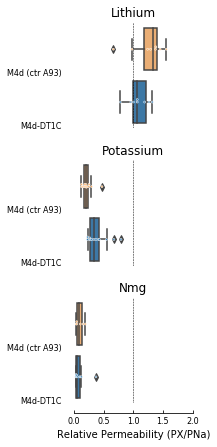

In [187]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 7))

orderCons = UninjAndChimera #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
    
sns.swarmplot(y= PotassiumChimera['Injection'], x=PotassiumChimera['Permeability'], data = PotassiumChimera,palette=sns.color_palette(colorsChimera), edgecolor='white', linewidth=0.5, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= PotassiumChimera['Injection'], x=PotassiumChimera['Permeability'], data = PotassiumChimera, palette=sns.color_palette(colorsChimera),ax=axes[1],order=orderCons)

sns.swarmplot(y= LithiumChimera['Injection'], x=LithiumChimera['Permeability'], data = LithiumChimera,palette=sns.color_palette(colorsChimera), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= LithiumChimera['Injection'], x=LithiumChimera['Permeability'], data = LithiumChimera, palette=sns.color_palette(colorsChimera),ax=axes[0],order=orderCons)

sns.swarmplot(y= NmgChimera['Injection'], x=NmgChimera['Permeability'], data = NmgChimera,palette=sns.color_palette(colorsChimera), edgecolor='white', linewidth=0.5, ax = axes[2], size =SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= NmgChimera['Injection'], x=NmgChimera['Permeability'], data = NmgChimera, palette=sns.color_palette(colorsChimera),ax=axes[2],order=orderCons)


YlimitPerm = [0,2]

for i in range(3): 
    axes[i].set_xlim(YlimitPerm)
    axes[i].spines['right'].set_visible(False)                                  # no spine at the right
    axes[i].spines['top'].set_visible(False)  # no spine at the top
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
    axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
    axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
    axes[i].spines['bottom'].set_position(('outward',10))  
    axes[i].spines['top'].set_position(('axes',5)) 
    axes[i].get_yaxis().set_tick_params(direction='in')
    axes[i].get_xaxis().set_tick_params(direction='in')
    #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
    axes[i].plot([1,1], [-10,50] , 'k--', color='#000000', linewidth=SizeofLine)
    #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
    axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
    #axes[i].yaxis.label.set_size(AxisLabelSize)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)
#     axes[i].yaxis.label.set_visible(False)
    
    n=0.5
    for M in range(len(labels2)):    
        axes[i].text(-0.2, n, labels2[M],ha='right',rotation=0,fontsize= AxisLegendSize)
        n = n+1
        #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

axes[1].set_title('Potassium',size=AxisLabelSize+2)    
axes[0].set_title('Lithium',size=AxisLabelSize+2) 
axes[2].set_title('Nmg',size=AxisLabelSize+2)

axes[2].xaxis.set_visible(True)
axes[2].spines['bottom'].set_visible(True)

axes[2].set_xlabel('')
#axes[2].set_ylabel('')

#axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
axes[2].set_xlabel('Relative Permeability (PX/PNa)', fontsize=AxisLabelSize)
#axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

plt.gcf().subplots_adjust(bottom=None, left=0.35,right=None, top=None,hspace=0.3, wspace=0.3)  

plt.savefig(filedirExportFig+"PermeabilityNtermChimeraTransposed"+'.pdf')
    

### Figure Relative permeability chimera heteromeric expression  - vertical alignment of mutations 

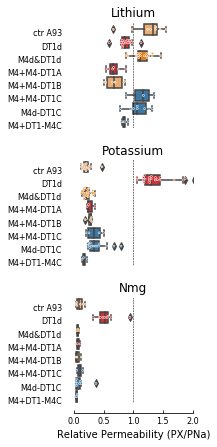

In [188]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 7))

orderCons = UninjAndChimeraHet #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = []
for i in range(0,len(LabelChimeraHet)):
    #labels2.append('')
    labels2.append(LabelChimeraHet[i])
    
sns.swarmplot(y= PotassiumChimeraHet['Injection'], x=PotassiumChimeraHet['Permeability'], data = PotassiumChimeraHet,palette=sns.color_palette(colorsChimeraHet), edgecolor='white', linewidth=0.5, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= PotassiumChimeraHet['Injection'], x=PotassiumChimeraHet['Permeability'], data = PotassiumChimeraHet, palette=sns.color_palette(colorsChimeraHet),ax=axes[1],order=orderCons)

sns.swarmplot(y= LithiumChimeraHet['Injection'], x=LithiumChimeraHet['Permeability'], data = LithiumChimeraHet,palette=sns.color_palette(colorsChimeraHet), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= LithiumChimeraHet['Injection'], x=LithiumChimeraHet['Permeability'], data = LithiumChimeraHet, palette=sns.color_palette(colorsChimeraHet),ax=axes[0],order=orderCons)

sns.swarmplot(y= NmgChimeraHet['Injection'], x=NmgChimeraHet['Permeability'], data = NmgChimeraHet,palette=sns.color_palette(colorsChimeraHet), edgecolor='white', linewidth=0.5, ax = axes[2], size =SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(y= NmgChimeraHet['Injection'], x=NmgChimeraHet['Permeability'], data = NmgChimeraHet, palette=sns.color_palette(colorsChimeraHet),ax=axes[2],order=orderCons)


YlimitPerm = [0,2]

for i in range(3): 
    axes[i].set_xlim(YlimitPerm)
    axes[i].spines['right'].set_visible(False)                                  # no spine at the right
    axes[i].spines['top'].set_visible(False)  # no spine at the top
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
    axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
    axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
    axes[i].spines['bottom'].set_position(('outward',10))  
    axes[i].spines['top'].set_position(('axes',5)) 
    axes[i].get_yaxis().set_tick_params(direction='in')
    axes[i].get_xaxis().set_tick_params(direction='in')
    #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
    axes[i].plot([1,1], [-10,50] , 'k--', color='#000000', linewidth=SizeofLine)
    #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
    axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
    #axes[i].yaxis.label.set_size(AxisLabelSize)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)
#     axes[i].yaxis.label.set_visible(False)
    
    n=0.5
    for M in range(len(labels2)):    
        axes[i].text(-0.2, n, labels2[M],ha='right',rotation=0,fontsize= AxisLegendSize)
        n = n+1
        #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

axes[1].set_title('Potassium',size=AxisLabelSize+2)    
axes[0].set_title('Lithium',size=AxisLabelSize+2) 
axes[2].set_title('Nmg',size=AxisLabelSize+2)

axes[2].xaxis.set_visible(True)
axes[2].spines['bottom'].set_visible(True)

axes[2].set_xlabel('')
#axes[2].set_ylabel('')

#axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
axes[2].set_xlabel('Relative Permeability (PX/PNa)', fontsize=AxisLabelSize)
#axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

plt.gcf().subplots_adjust(bottom=None, left=0.35,right=None, top=None,hspace=0.3, wspace=0.3)  

plt.savefig(filedirExportFig+"PermeabilityNtermChimeraHetTransposed"+'.pdf')
    

### Figure Relative permeability chimera mutations - horizantal alignment of mutations 

In [189]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

# orderCons = UninjAndChimera #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

# labels2 = []
# for i in range(0,len(LabelChimera)):
#     #labels2.append('')
#     labels2.append(LabelChimera[i])
    
# sns.swarmplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera,palette=sns.color_palette(colorsChimera), edgecolor='white', linewidth=0.5, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
# sns.boxplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera, palette=sns.color_palette(colorsChimera),ax=axes[1],order=orderCons)

# sns.swarmplot(x= LithiumChimera['Injection'], y=LithiumChimera['Permeability'], data = LithiumChimera,palette=sns.color_palette(colorsChimera), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
# sns.boxplot(x= LithiumChimera['Injection'], y=LithiumChimera['Permeability'], data = LithiumChimera, palette=sns.color_palette(colorsChimera),ax=axes[0],order=orderCons)

# sns.swarmplot(x= NmgChimera['Injection'], y=NmgChimera['Permeability'], data = NmgChimera,palette=sns.color_palette(colorsChimera), edgecolor='white', linewidth=0.5, ax = axes[2], size =SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
# sns.boxplot(x= NmgChimera['Injection'], y=NmgChimera['Permeability'], data = NmgChimera, palette=sns.color_palette(colorsChimera),ax=axes[2],order=orderCons)


# YlimitPerm = [0,2]

# for i in range(3): 
#     axes[i].set_ylim(YlimitPerm)
#     axes[i].spines['right'].set_visible(False)                                  # no spine at the right
#     axes[i].spines['top'].set_visible(False)  # no spine at the top
#     axes[i].spines['bottom'].set_visible(False)
#     axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
#     axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
#     axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
#     axes[i].spines['bottom'].set_position(('outward',10))  
#     axes[i].spines['top'].set_position(('axes',5)) 
#     axes[i].get_yaxis().set_tick_params(direction='in')
#     axes[i].get_xaxis().set_tick_params(direction='in')
#     #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#     axes[i].plot([-1,50], [1,1] , 'k--', color='#000000', linewidth=SizeofLine)
#     #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
#     axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
#     axes[i].yaxis.label.set_size(AxisLabelSize)
#     axes[i].xaxis.set_visible(False)
    
#     n=0.2
#     for M in range(len(labels2)):    
#         axes[i].text(n, -0.4, labels2[M],ha='right',rotation=30,fontsize= AxisLegendSize)
#         n = n+0.9
#         #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

# axes[1].set_title('Potassium',size=AxisLabelSize)    
# axes[0].set_title('Lithium',size=AxisLabelSize) 
# axes[2].set_title('Nmg',size=AxisLabelSize)

# axes[1].set_ylabel('')
# axes[2].set_ylabel('')

# #axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
# axes[0].set_ylabel('Relative Permeability (PX/PNa)', fontsize=AxisLabelSize)
# #axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

# plt.gcf().subplots_adjust(bottom=0.25, left=0.2,right=None, top=None,hspace=0.75, wspace=0.9)  

# plt.savefig(filedirExportFig+"PermeabilityNtermChimera"+'.pdf')
    

# Control Quality Check

# Change in current 

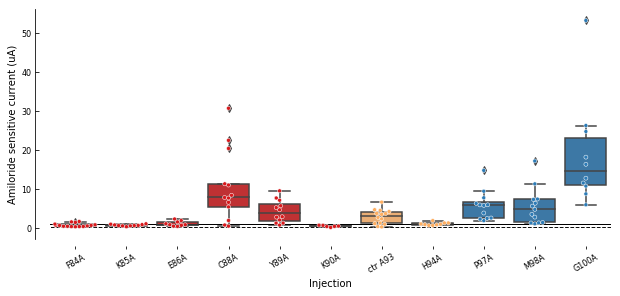

In [190]:
fig = plt.figure(figsize=(12, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

#labels2 = ['Uninj']
labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= Potassium['Injection'], y=Potassium['Iminus85Test']*1000000, data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Potassium['Injection'], y=Potassium['Iminus85Test']*1000000, data = Potassium, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,2]

##### AXIS 1 ####
#ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
# ax1.set_title('Potassium',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Amiloride sensitive current (uA)', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')

#F84 - K90 = A (7)
#T91 - G95 = B (5-1 = 4)
#I96 - G100 = C (5)


